<a href="https://colab.research.google.com/github/diegosfc91/CODING-DOJO-DIEGO/blob/main/Simulaci%C3%B3n_del_Examen_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación del Examen (Core)

In [ ]:
import pandas as pd
import numpy as np
import random

# Configuramos la semilla para reproducibilidad
np.random.seed(42)

# Generamos los datos sintéticos
user_id = range(1, 301)
app_version = np.random.choice(['1.0', '1.1', '1.2', '1.3'], 300)
platform = np.random.choice(['Android', 'iOS'], 300)
session_duration = np.random.randint(1, 180, 300)
number_of_sessions = np.random.randint(1, 20, 300)
country = np.random.choice(['USA', 'Canada', 'Mexico', 'UK', 'Germany', 'France', 'Spain', 'Italy'], 300)
user_feedback = np.random.randint(1, 6, 300)

# Creamos el DataFrame
data = pd.DataFrame({
    'user_id': user_id,
    'app_version': app_version,
    'platform': platform,
    'session_duration': session_duration,
    'number_of_sessions': number_of_sessions,
    'country': country,
    'user_feedback': user_feedback
})

# Guardamos los datos en un archivo CSV
data.to_csv('user_app_data.csv', index=False)
print("Datos generados y guardados en 'user_app_data.csv'")
data

Datos generados y guardados en 'user_app_data.csv'


,user_id,app_version,platform,session_duration,number_of_sessions,country,user_feedback
0,1,1.2,Android,109,11,France,1
1,2,1.3,Android,116,17,UK,2
2,3,1.0,Android,94,13,France,5
3,4,1.2,iOS,47,1,Canada,4
4,5,1.2,iOS,99,2,Canada,3
...,...,...,...,...,...,...,...
295,296,1.3,iOS,33,4,UK,1
296,297,1.1,Android,118,6,Germany,2
297,298,1.2,Android,65,1,Germany,5
298,299,1.0,iOS,146,5,France,5


# Limpieza de Datos

In [ ]:
# 1. Identificar y abordar valores duplicados

duplicados = data.duplicated().sum() # Verificar si hay duplicados
print(f"Cantidad de filas duplicadas: {duplicados}")

if duplicados > 0:
    data = data.drop_duplicates() # Eliminar duplicados si los hay
    print("Duplicados eliminados.")

# 2. Identificar y abordar valores faltantes

valores_faltantes = data.isnull().sum() # Verificar valores faltantes
print("\nValores faltantes por columna:")
print(valores_faltantes)

for col in ['app_version', 'platform', 'country']:
    data[col].fillna(data[col].mode()[0], inplace=True) # Rellenar valores categóricos faltantes (app_version, platform, country) con la moda

for col in ['session_duration', 'number_of_sessions', 'user_feedback']:
    data[col].fillna(data[col].median(), inplace=True) # Rellenar valores numéricos faltantes (session_duration, number_of_sessions, user_feedback) con la mediana

print("Valores faltantes tratados.")

# 3. Asegurar que los tipos de datos coincidan con el diccionario de datos

data = data.astype({
    'user_id': 'int64',
    'app_version': 'object',
    'platform': 'object',
    'session_duration': 'int64',
    'number_of_sessions': 'int64',
    'country': 'object',
    'user_feedback': 'int64'
})

print("\nTipos de datos después de la conversión:")
print(data.dtypes)

# 4. Identificar y abordar inconsistencias en los valores categóricos

data['platform'] = data['platform'].str.title() # Convertir todas las plataformas a formato título (primera letra mayúscula)
print("\nValores únicos de 'platform' después de la normalización:")
print(data['platform'].unique())

# 5. Identificar y abordar datos inapropiados o inusuales

outliers_session_duration = data[data['session_duration'] > 1440] # Para session_duration, un valor inusualmente alto sería, por ejemplo, > 1440 minutos (1 día completo)

if not outliers_session_duration.empty:
    print("\nSe encontraron datos inusuales en 'session_duration'.")
    print(outliers_session_duration)
    data = data[data['session_duration'] <= 1440] #aca se eliminan las sesiones mayores a 1440 minutos
    print("Datos inusuales en 'session_duration' eliminados.")


outliers_feedback = data[(data['user_feedback'] < 1) | (data['user_feedback'] > 5)] # Revisar el feedback de usuarios fuera del rango (por ejemplo, fuera de 1 a 5)

if not outliers_feedback.empty:
    print("\nSe encontraron datos inusuales en 'user_feedback'.")
    print(outliers_feedback)

    data['user_feedback'] = data['user_feedback'].clip(1, 5)   # Podemos reemplazar estos valores inusuales con la mediana
    print("Datos inusuales en 'user_feedback' corregidos.")

data.to_csv('user_app_data_clean.csv', index=False) # Guardar el dataset limpio en un nuevo archivo CSV
print("Datos limpios guardados en 'user_app_data_clean.csv'.")


Cantidad de filas duplicadas: 0

Valores faltantes por columna:
user_id               0
app_version           0
platform              0
session_duration      0
number_of_sessions    0
country               0
user_feedback         0
dtype: int64
Valores faltantes tratados.

Tipos de datos después de la conversión:
user_id                int64
app_version           object
platform              object
session_duration       int64
number_of_sessions     int64
country               object
user_feedback          int64
dtype: object

Valores únicos de 'platform' después de la normalización:
['Android' 'Ios']
Datos limpios guardados en 'user_app_data_clean.csv'.


<ipython-input-3-380a78f82360>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
<ipython-input-3-380a78f82360>:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

# Exploración de Dato

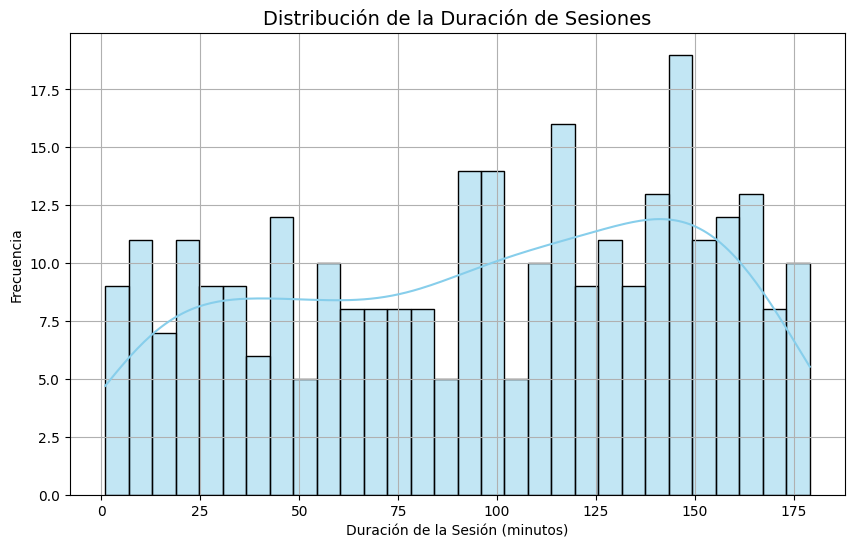

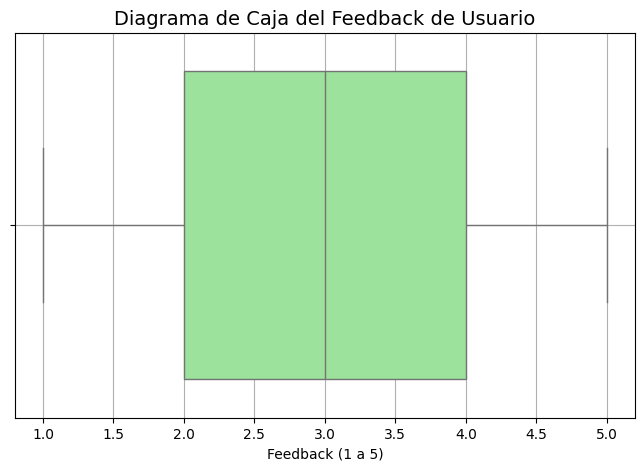

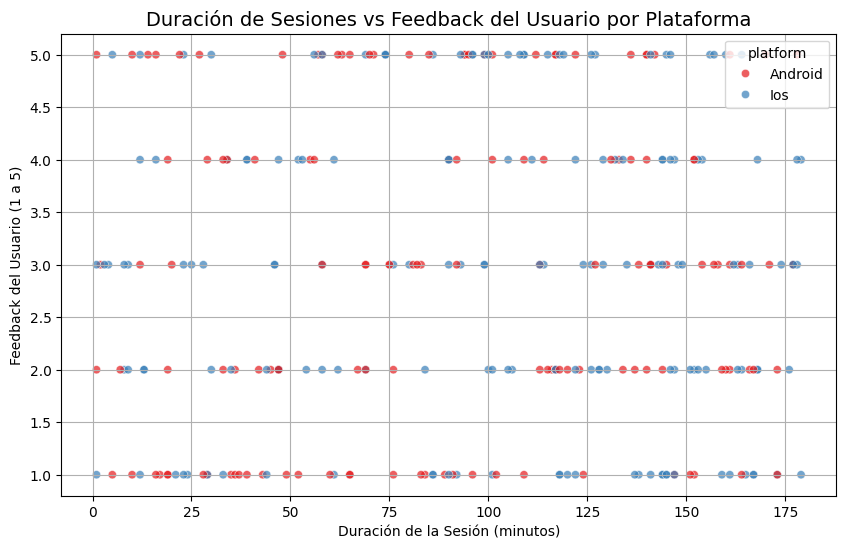

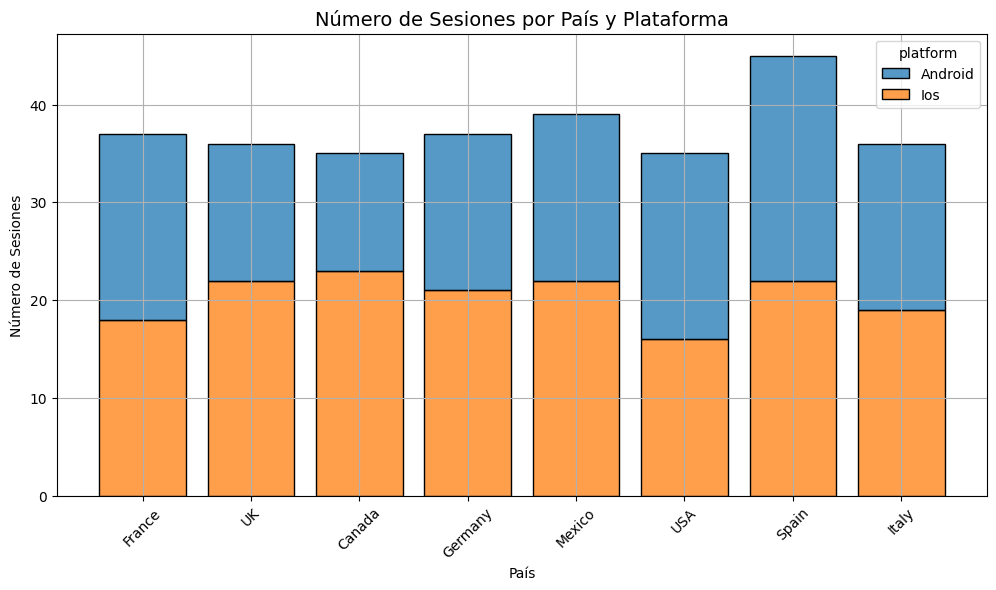

In [ ]:
# Dos tipos diferentes de visualizaciones exploratorias univariantes.

import seaborn as sns
import matplotlib.pyplot as plt

### Visualización Univariante 1: Histograma de Duración de Sesiones

plt.figure(figsize=(10, 6))
sns.histplot(data['session_duration'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de la Duración de Sesiones', fontsize=14)
plt.xlabel('Duración de la Sesión (minutos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

### Visualización Univariante 2: Diagrama de Caja del Feedback de Usuario

plt.figure(figsize=(8, 5))
sns.boxplot(x=data['user_feedback'], color='lightgreen')
plt.title('Diagrama de Caja del Feedback de Usuario', fontsize=14)
plt.xlabel('Feedback (1 a 5)')
plt.grid(True)
plt.show()

# Dos tipos diferentes de visualizaciones exploratorias multivariantes.

### Visualización Multivariante 1: Gráfico de Dispersión (Scatter Plot) de Duración de Sesiones vs Feedback del Usuario

plt.figure(figsize=(10, 6))
sns.scatterplot(x='session_duration', y='user_feedback', hue='platform', data=data, palette='Set1', alpha=0.7)
plt.title('Duración de Sesiones vs Feedback del Usuario por Plataforma', fontsize=14)
plt.xlabel('Duración de la Sesión (minutos)')
plt.ylabel('Feedback del Usuario (1 a 5)')
plt.grid(True)
plt.show()

### Visualización Multivariante 2: Gráfico de Barras Apilado (Stacked Bar) de Número de Sesiones por País y Plataforma

plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='country', hue='platform', multiple='stack', shrink=0.8)
plt.title('Número de Sesiones por País y Plataforma', fontsize=14)
plt.xlabel('País')
plt.ylabel('Número de Sesiones')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
